# Image Classification with CNN for Malaria Data

In [1]:
from zipfile import ZipFile
file_name='malaria.zip'
with ZipFile(file_name,'r') as zip:
          zip.extractall()

In [6]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
import cv2
import keras
#from tensorflow.keras.utils import np_utils

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
            
from random import shuffle
from tqdm import tqdm  
import scipy
import skimage
from skimage.transform import resize
import random

In [7]:
parasitezed = "cell_images/Parasitized/"
uninfected =  "cell_images/Uninfected/"

In [9]:
Pim = os.listdir(parasitezed)
Nim = os.listdir(uninfected)

In [10]:
data=[]
labels=[]
Parasitized=os.listdir("cell_images/Parasitized/")
for a in Parasitized:
    try:
        image=cv2.imread("cell_images/Parasitized/"+a)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50, 50))
        data.append(np.array(size_image))
        labels.append(0)
    except AttributeError:
        print("")

Uninfected=os.listdir("cell_images/Uninfected/")
for b in Uninfected:
    try:
        image=cv2.imread("cell_images/Uninfected/"+b)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50, 50))
        data.append(np.array(size_image))
        labels.append(1)
    except AttributeError:
        print("")

In [11]:
Cells=np.array(data)
labels=np.array(labels)

In [12]:
np.save("Cells",Cells)
np.save("labels",labels)

In [13]:
Cells=np.load("Cells.npy")
labels=np.load("labels.npy")

In [14]:
s=np.arange(Cells.shape[0])
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

In [15]:
num_classes=len(np.unique(labels))
len_data=len(Cells)

In [16]:
(x_train,x_test)=Cells[(int)(0.1*len_data):],Cells[:(int)(0.1*len_data)]
x_train = x_train.astype('float32')/255 #data normalization
x_test = x_test.astype('float32')/255
train_len=len(x_train)
test_len=len(x_test)

In [17]:
(y_train,y_test)=labels[(int)(0.1*len_data):],labels[:(int)(0.1*len_data)]

In [18]:
y_train=keras.utils.to_categorical(y_train,num_classes) #OHE
y_test=keras.utils.to_categorical(y_test,num_classes)

In [19]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Set random seed
np.random.seed(0)

In [20]:
'''Bu kod, temel bir CNN modelinin oluşturulmasını ve bu modele ait yapı ve 
parametre bilgilerini özetleyen bir örnektir.'''

model=Sequential()
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(2,activation="softmax"))#2 represent output layer neurons 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 25, 25, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 32)        0

In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

In [23]:
h=model.fit(x_train,y_train,batch_size=32,callbacks=callbacks, validation_data=(x_test,y_test),epochs=20,verbose=1)

Epoch 1/20
776/776 [==============================] - 9s 12ms/step - loss: 0.4204 - accuracy: 0.7872 - val_loss: 0.1867 - val_accuracy: 0.9408
Epoch 2/20
 16/776 [..............................] - ETA: 8s - loss: 0.2097 - accuracy: 0.9277

/Users/user/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


776/776 [==============================] - 9s 11ms/step - loss: 0.1684 - accuracy: 0.9484 - val_loss: 0.1659 - val_accuracy: 0.9495
Epoch 3/20
776/776 [==============================] - 9s 12ms/step - loss: 0.1512 - accuracy: 0.9534 - val_loss: 0.1640 - val_accuracy: 0.9485
Epoch 4/20
776/776 [==============================] - 9s 12ms/step - loss: 0.1454 - accuracy: 0.9550 - val_loss: 0.1524 - val_accuracy: 0.9543
Epoch 5/20
776/776 [==============================] - 9s 12ms/step - loss: 0.1407 - accuracy: 0.9560 - val_loss: 0.1548 - val_accuracy: 0.9525
Epoch 6/20
776/776 [==============================] - 9s 12ms/step - loss: 0.1366 - accuracy: 0.9565 - val_loss: 0.1496 - val_accuracy: 0.9561
Epoch 7/20
776/776 [==============================] - 10s 12ms/step - loss: 0.1324 - accuracy: 0.9564 - val_loss: 0.1428 - val_accuracy: 0.9561
Epoch 8/20
776/776 [==============================] - 10s 13ms/step - loss: 0.1298 - accuracy: 0.9577 - val_loss: 0.1461 - val_accuracy: 0.9550
Epoch 9/

In [24]:
from numpy import loadtxt
from keras.models import load_model
model = load_model('.mdl_wts.hdf5')

In [25]:
score=model.evaluate(x_test,y_test)
print(score)

87/87 [==============================] - 0s 4ms/step - loss: 0.1428 - accuracy: 0.9561
[0.142833411693573, 0.9560798406600952]


In [26]:
accuracy = model.evaluate(x_test, y_test, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])

87/87 [==============================] - 0s 4ms/step - loss: 0.1428 - accuracy: 0.9561

 Test_Accuracy:- 0.9560798406600952


In [27]:
from sklearn.metrics import confusion_matrix
pred = model.predict(x_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

87/87 [==============================] - 0s 4ms/step


In [29]:
pip install mlxtend


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 120.8 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


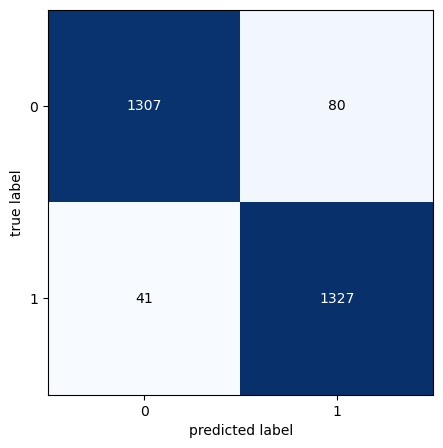

In [30]:
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

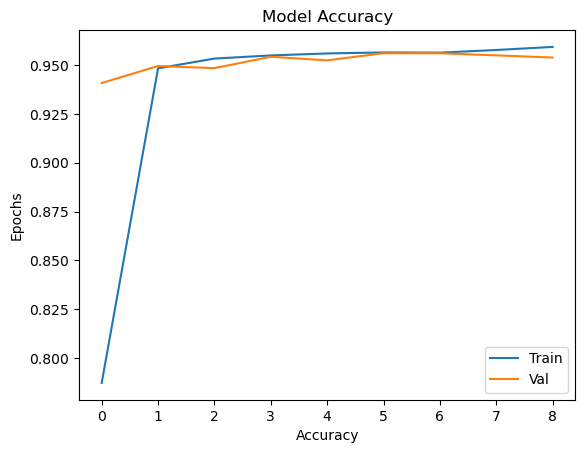

In [36]:

plt.plot(h.history['accuracy'])
plt.plot(h.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Epochs")
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score

In [40]:
fpr_keras, tpr_keras, thresholds = roc_curve(y_true.ravel(), pred.ravel())
auc_keras = roc_auc_score(y_true.ravel(), pred.ravel())
print("AUC:", auc_keras)

AUC: 0.9561753985420172


In [41]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

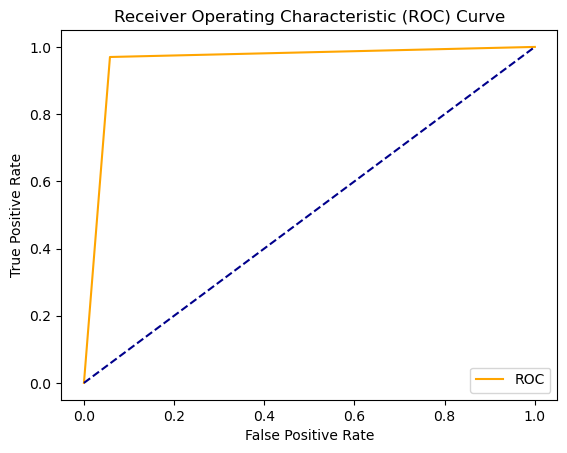

In [42]:
'''Eğri altındaki alanı (AUC) değeri, ROC eğrisinin altındaki alanı ifade eder ve modelin performansını 
ölçmek için yaygın olarak kullanılır.'''
plot_roc_curve(fpr_keras, tpr_keras)

In [43]:
from sklearn.metrics import classification_report

In [44]:



print('{}'.format( 
                           classification_report(y_true , pred)))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      1387
           1       0.94      0.97      0.96      1368

    accuracy                           0.96      2755
   macro avg       0.96      0.96      0.96      2755
weighted avg       0.96      0.96      0.96      2755



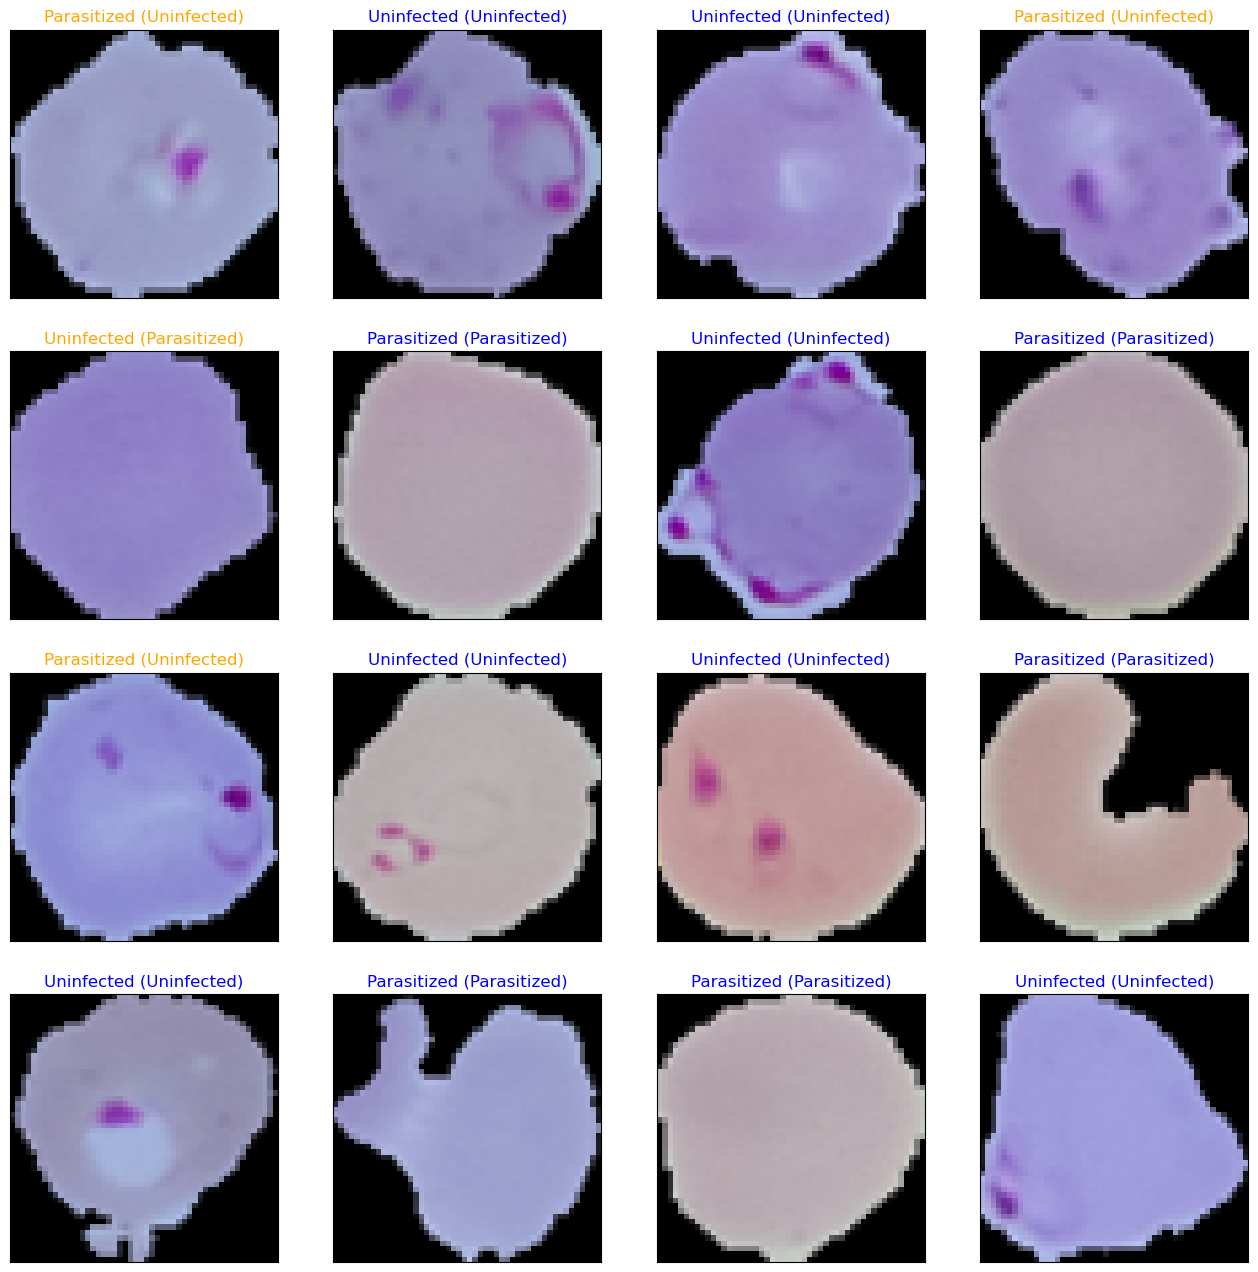

In [47]:

'''Bu kod bloğu, test veri setinde rastgele seçilen 16 örneğin görüntülerini, tahminlerini ve 
gerçek sınıflarını görselleştirir. Başlık rengi, tahminin doğru olup olmadığına göre belirlenir 
(doğru ise mavi, yanlış ise turuncu).'''

import numpy as np
import matplotlib.pyplot as plt
malaria_labels = ["Uninfected", "Parasitized"]
fig = plt.figure(figsize=(16, 16))

for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_train[idx])  # Replace y_pred with your predicted values
    true_idx = np.argmax(y_test[idx])  # Replace y_test with your true labels
    ax.set_title("{} ({})".format(malaria_labels[pred_idx], malaria_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "orange"))

plt.show()
